# Super Resolution Notebook using stable diffusion

In [2]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-vpy51o91
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-vpy51o91
  Resolved https://github.com/huggingface/diffusers.git to commit 25ed7cb08bbfd703e2dc9a0e88641ce17c74deb0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 5.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for diffusers: filename=diffusers-0.15.0.dev0-py3-none-any.whl size=749412 sha256=65683934feb1c20a72449c8795b04211d5c9e870d2d7f699f97f7ea16e823174
  Stored in directory: /tmp/pip-ephem-wheel-cache-9cz99fie/wheels/02/d2/24/9d4a75289c359ffceca56b42aecb8e8fbf659c455bcd4d2eca
Successfully built diffusers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.12.1
    Uninstalling huggingface-hub-0.12.1:

# Imports

In [15]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

In [5]:
# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
# url = "https://user-images.githubusercontent.com/38061659/199705896-b48e17b8-b231-47cd-a270-4ffa5a93fa3e.png"
# response = requests.get(url)
# low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
# low_res_img = low_res_img.resize((128, 128))

In [38]:
low_res_img = Image.open("/kaggle/input/super-image-resolution/Data/LR/25.png")

# LR Image

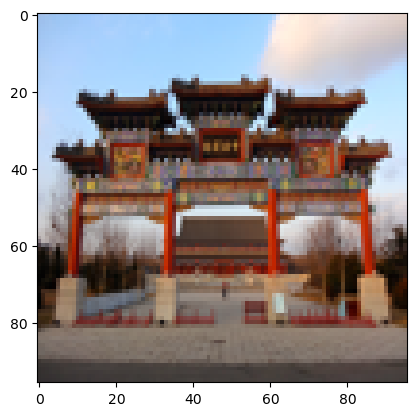

In [39]:
plt.imshow(low_res_img)
plt.show()

In [41]:
upscaled_image = pipeline(low_res_img, num_inference_steps=100, eta=1).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
# save image
upscaled_image.save("ldm_generated_image.png")

# HR Image

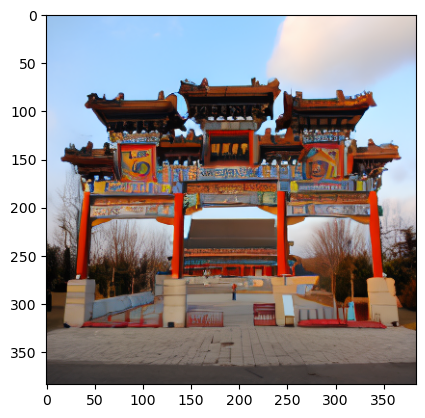

In [43]:
plt.imshow(upscaled_image)
plt.show()